In [1]:
import nibabel
import matplotlib.pyplot
%matplotlib inline

In [5]:
!git clone https://github.com/NYUMedML/DARTS.git

Cloning into 'DARTS'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 411 (delta 63), reused 53 (delta 30), pack-reused 300
Receiving objects: 100% (411/411), 38.58 MiB | 1.07 MiB/s, done.
Resolving deltas: 100% (201/201), done.


In [7]:
!python3 DARTS/DARTS/perform_pred.py --help

usage: perform_pred.py [-h] [--input_image_path INPUT_IMAGE_PATH]
                       [--segmentation_dir_path SEGMENTATION_DIR_PATH]
                       [--file_name FILE_NAME] [--model_type MODEL_TYPE]
                       [--model_wts_path MODEL_WTS_PATH] [--is_mgz]

optional arguments:
  -h, --help            show this help message and exit
  --input_image_path INPUT_IMAGE_PATH
                        Path to input image (can be of .mgz or .nii.gz
                        format)(required)
  --segmentation_dir_path SEGMENTATION_DIR_PATH
                        Directory path to save the output segmentation
                        (required)
  --file_name FILE_NAME
                        Name of the segmentation file (required)
  --model_type MODEL_TYPE
                        Model types: "dense-unet", "unet" (default: "dense-
                        unet")
  --model_wts_path MODEL_WTS_PATH
                        Path for model wts to be used, provide a model from
        

In [71]:
# Replace according to local file paths and preferences
# GPU required for use

!python3 DARTS/DARTS/perform_pred.py --input_image_path './../../../data_orig/199251/mri/T1.mgz' \
--segmentation_dir_path './sample_pred/' \
--file_name '199251' \
--is_mgz \
--model_wts_path './saved_model_wts/dense_unet_back2front_non_finetuned.pth'

Loading model
Model Loaded, Loading image
Segmenting the image
Segmentation Completed, Saving the predictions
Predictions saved at  ./sample_pred/


In [73]:
# For use with image types .mgz or .mgh
# replace string with output image path
pred = nibabel.freesurfer.MGHImage.from_filename('./sample_pred/199251_seg.mgz').get_data()

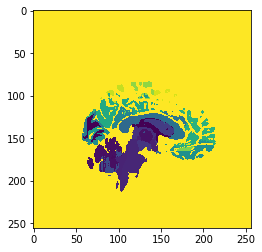

In [78]:
plt.imshow(pred[128,:,:])

In [76]:
# replace string with input image path
image = nibabel.freesurfer.MGHImage.from_filename('./../../../data_orig/199251/mri/T1.mgz').get_data()

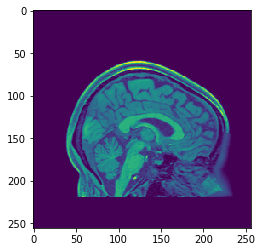

In [77]:
plt.imshow(image[126,:,:])

In [70]:
# For use with image types .nii or .nii.gz
pred= nibabel.load('./sample_pred/HLN-12-10_seg.nii.gz').get_data()